In [ ]:
import pandas as pd


file_path = "/content/drive/MyDrive/OnlineRetail.xlsx"

df = pd.read_excel(file_path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

there is 8 columns and 541909 rows

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303




*   Description & CustomerID have missing values
*   CustumerID and UnitPrice are float, others are object except quantity that is int and InvoiceDate that is datetime64[ns]






In [ ]:
# Handeling missing values
df = df.dropna(subset=["CustomerID"])

In [ ]:
# andeling data types
df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
print("Number of rows after cleaning:", df.shape[0])


Number of rows after cleaning: 406829


In [ ]:
df.duplicated().sum()

np.int64(5225)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [ ]:
df['Country'].nunique()

37

<Axes: title={'center': 'Top 10 Countries by Transactions'}, xlabel='Country'>

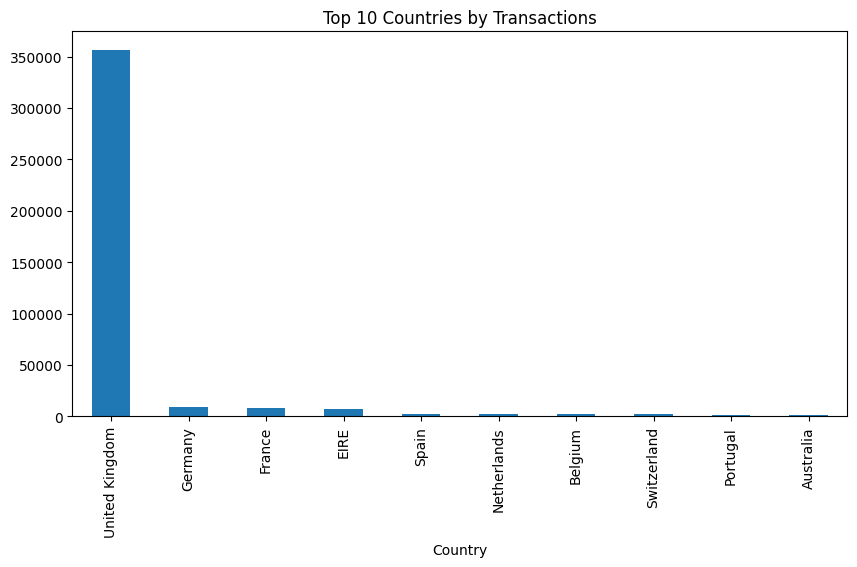

In [ ]:
# Number of transactions by country (top 10)
df['Country'].value_counts().head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Countries by Transactions')


<Axes: title={'center': 'Top 10 Countries by Revenue'}, xlabel='Country'>

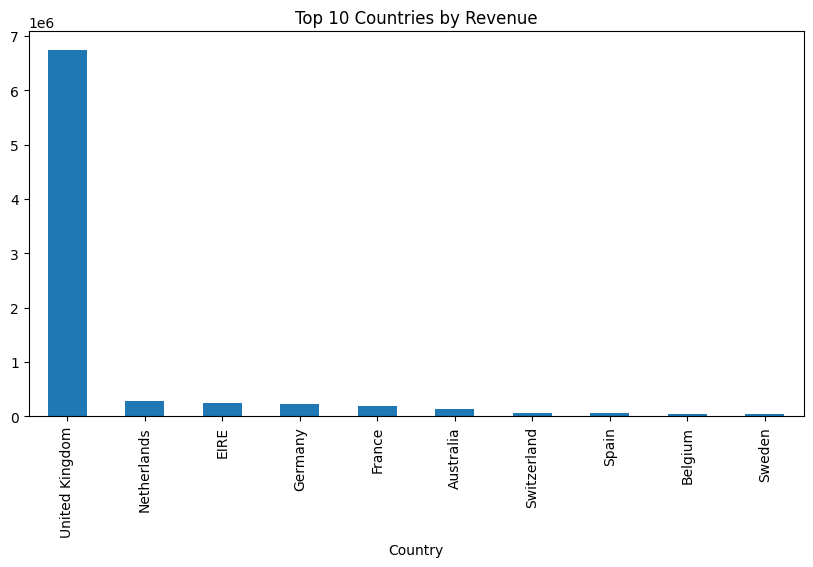

In [ ]:
# Add a new column for total price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Group by country and sum revenue
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Plot top 10 countries
country_revenue.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Countries by Revenue')


<Axes: title={'center': 'Daily Number of Orders'}, xlabel='InvoiceDate'>

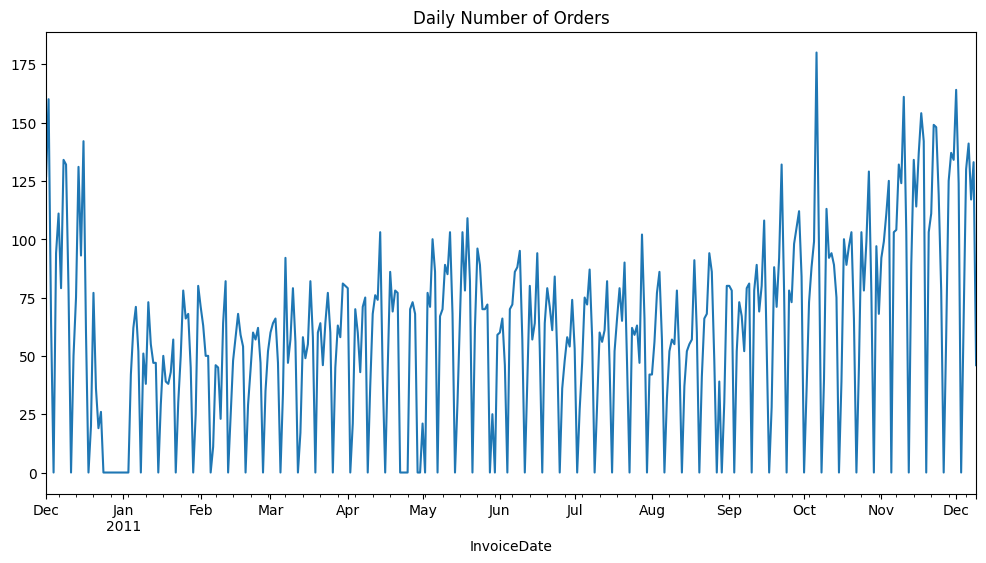

In [ ]:
# Set date as index (temporary)
df.set_index('InvoiceDate', inplace=True)

# Resample to get number of transactions per day
daily_orders = df.resample('D')['InvoiceNo'].nunique()

# Plot
daily_orders.plot(figsize=(12,6), title='Daily Number of Orders')


In [ ]:
df.reset_index(inplace=True)


<Axes: title={'center': 'Top 10 Customers by Revenue'}, xlabel='CustomerID'>

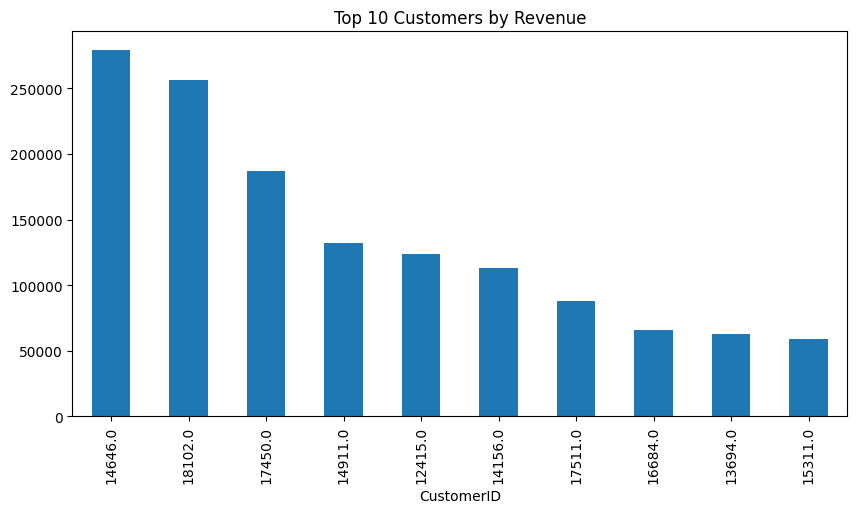

In [ ]:
# Total revenue per customer
customer_revenue = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)

# Plot top 10
customer_revenue.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Customers by Revenue')


In [ ]:
import datetime as dt

# Use max date in dataset as "today"
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print("Snapshot date:", snapshot_date)


Snapshot date: 2011-12-10 12:50:00


In [ ]:
# Group by customer and calculate metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Show a sample
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


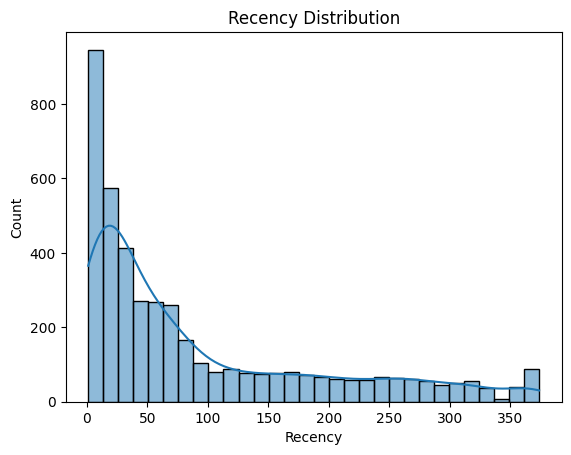

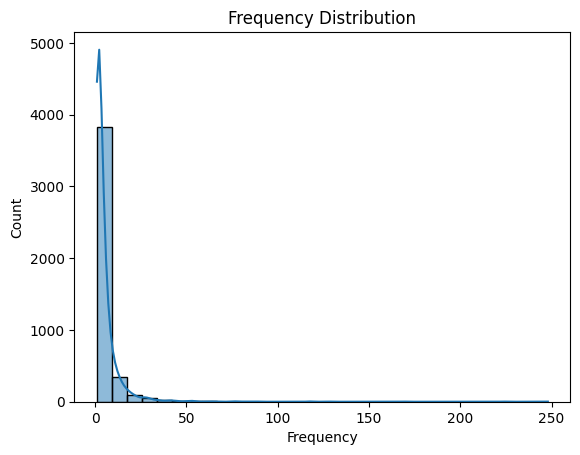

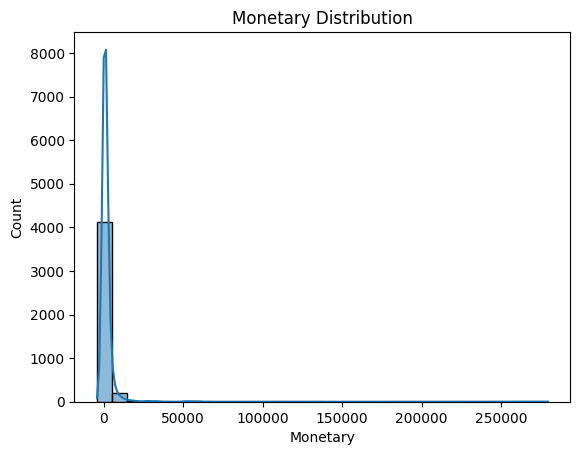

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recency distribution
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title("Recency Distribution")
plt.show()

# Frequency distribution
sns.histplot(rfm['Frequency'], bins=30, kde=True)
plt.title("Frequency Distribution")
plt.show()

# Monetary distribution
sns.histplot(rfm['Monetary'], bins=30, kde=True)
plt.title("Monetary Distribution")
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler and fit_transform
scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Put it back into a DataFrame
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])


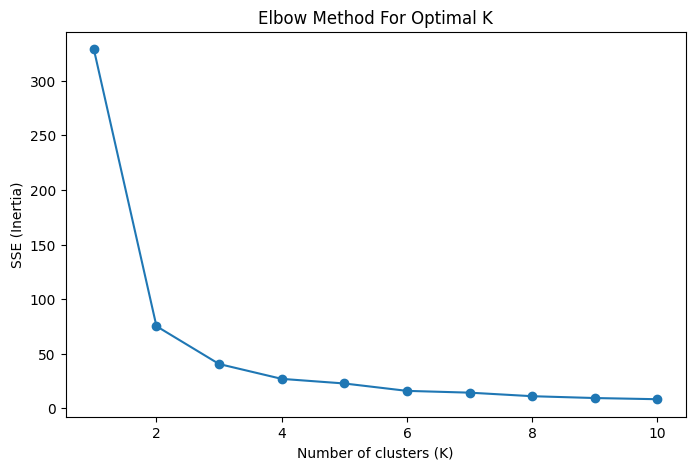

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try K from 1 to 10
sse = []  # sum of squared errors

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal K')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans with K = 3
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_scaled['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Add cluster labels to the original RFM table
rfm['Cluster'] = rfm_scaled['Cluster']


In [ ]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()


,Recency,Frequency,Monetary
Cluster,,,
0,40.544073,6.123708,2358.763126
1,310.198807,1.538767,359.733638
2,195.181347,2.191710,582.457204


We segmented our customers into 3 groups using RFM and K-Means.
Cluster 0 are our loyal VIPs, Cluster 1 are lost/low-value customers, and Cluster 2 are occasional buyers.
This insight helps us tailor marketing campaigns to each group and boost business value

In [ ]:
vip_customers = rfm[rfm['Cluster'] == 0]
vip_customers

,CustomerID,Recency,Frequency,Monetary,Cluster
1,12347.0,2,7,4310.00,0
2,12348.0,75,4,1797.24,0
3,12349.0,19,1,1757.55,0
5,12352.0,36,11,1545.41,0
9,12356.0,23,3,2811.43,0
...,...,...,...,...,...
4365,18277.0,58,2,97.63,0
4366,18278.0,74,1,173.90,0
4369,18282.0,8,3,176.60,0
4370,18283.0,4,16,2045.53,0


In [ ]:
def cluster_names (clstr):
  if clstr == 0 :
    return "VIP Customers"
  elif clstr == 1 :
    return "Lost Customers"
  elif clstr == 2 :
    return "Potential Customers"
  else:
    return "Unknown cluster"


rfm['ClusterName'] = rfm['Cluster'].map(cluster_names)
rfm

,CustomerID,Recency,Frequency,Monetary,Cluster,ClusterName
0,12346.0,326,2,0.00,1,Lost Customers
1,12347.0,2,7,4310.00,0,VIP Customers
2,12348.0,75,4,1797.24,0,VIP Customers
3,12349.0,19,1,1757.55,0,VIP Customers
4,12350.0,310,1,334.40,1,Lost Customers
...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,1,Lost Customers
4368,18281.0,181,1,80.82,2,Potential Customers
4369,18282.0,8,3,176.60,0,VIP Customers
4370,18283.0,4,16,2045.53,0,VIP Customers


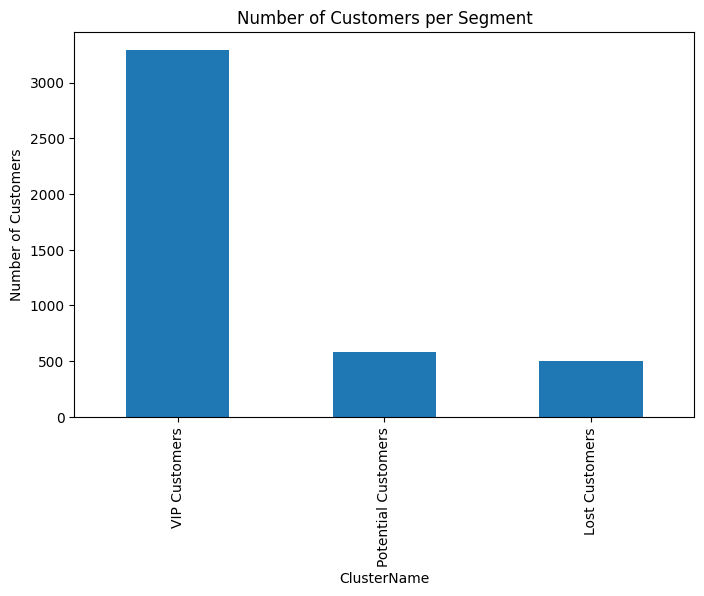

In [ ]:
import matplotlib.pyplot as plt

rfm['ClusterName'].value_counts().plot(kind='bar', figsize=(8,5), title='Number of Customers per Segment')
plt.ylabel('Number of Customers')
plt.show()


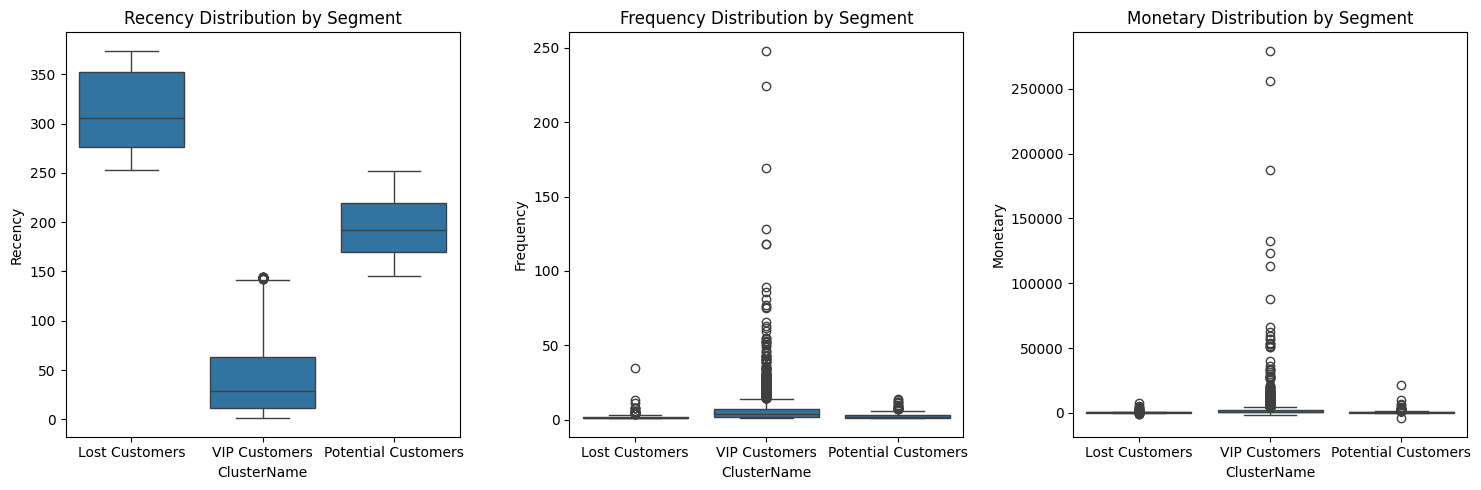

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x='ClusterName', y='Recency', data=rfm)
plt.title('Recency Distribution by Segment')

plt.subplot(1,3,2)
sns.boxplot(x='ClusterName', y='Frequency', data=rfm)
plt.title('Frequency Distribution by Segment')

plt.subplot(1,3,3)
sns.boxplot(x='ClusterName', y='Monetary', data=rfm)
plt.title('Monetary Distribution by Segment')

plt.tight_layout()
plt.show()


In [ ]:
rfm.to_excel('customer_segmentation_final.xlsx', index=False)
